# Gen stats (deprecated)

Top 10 events:
 {'Speech': 0.5316492, 'Inside, small room': 0.05722548, 'Male speech, man speaking': 0.007937733, 'Music': 0.006909308, 'Inside, large room or hall': 0.0054878504, 'Narration, monologue': 0.003282764, 'Conversation': 0.0023735682, 'Gasp': 0.0012532785, 'Clicking': 0.0011773418, 'Female speech, woman speaking': 0.0010367723}


<AxesSubplot:>

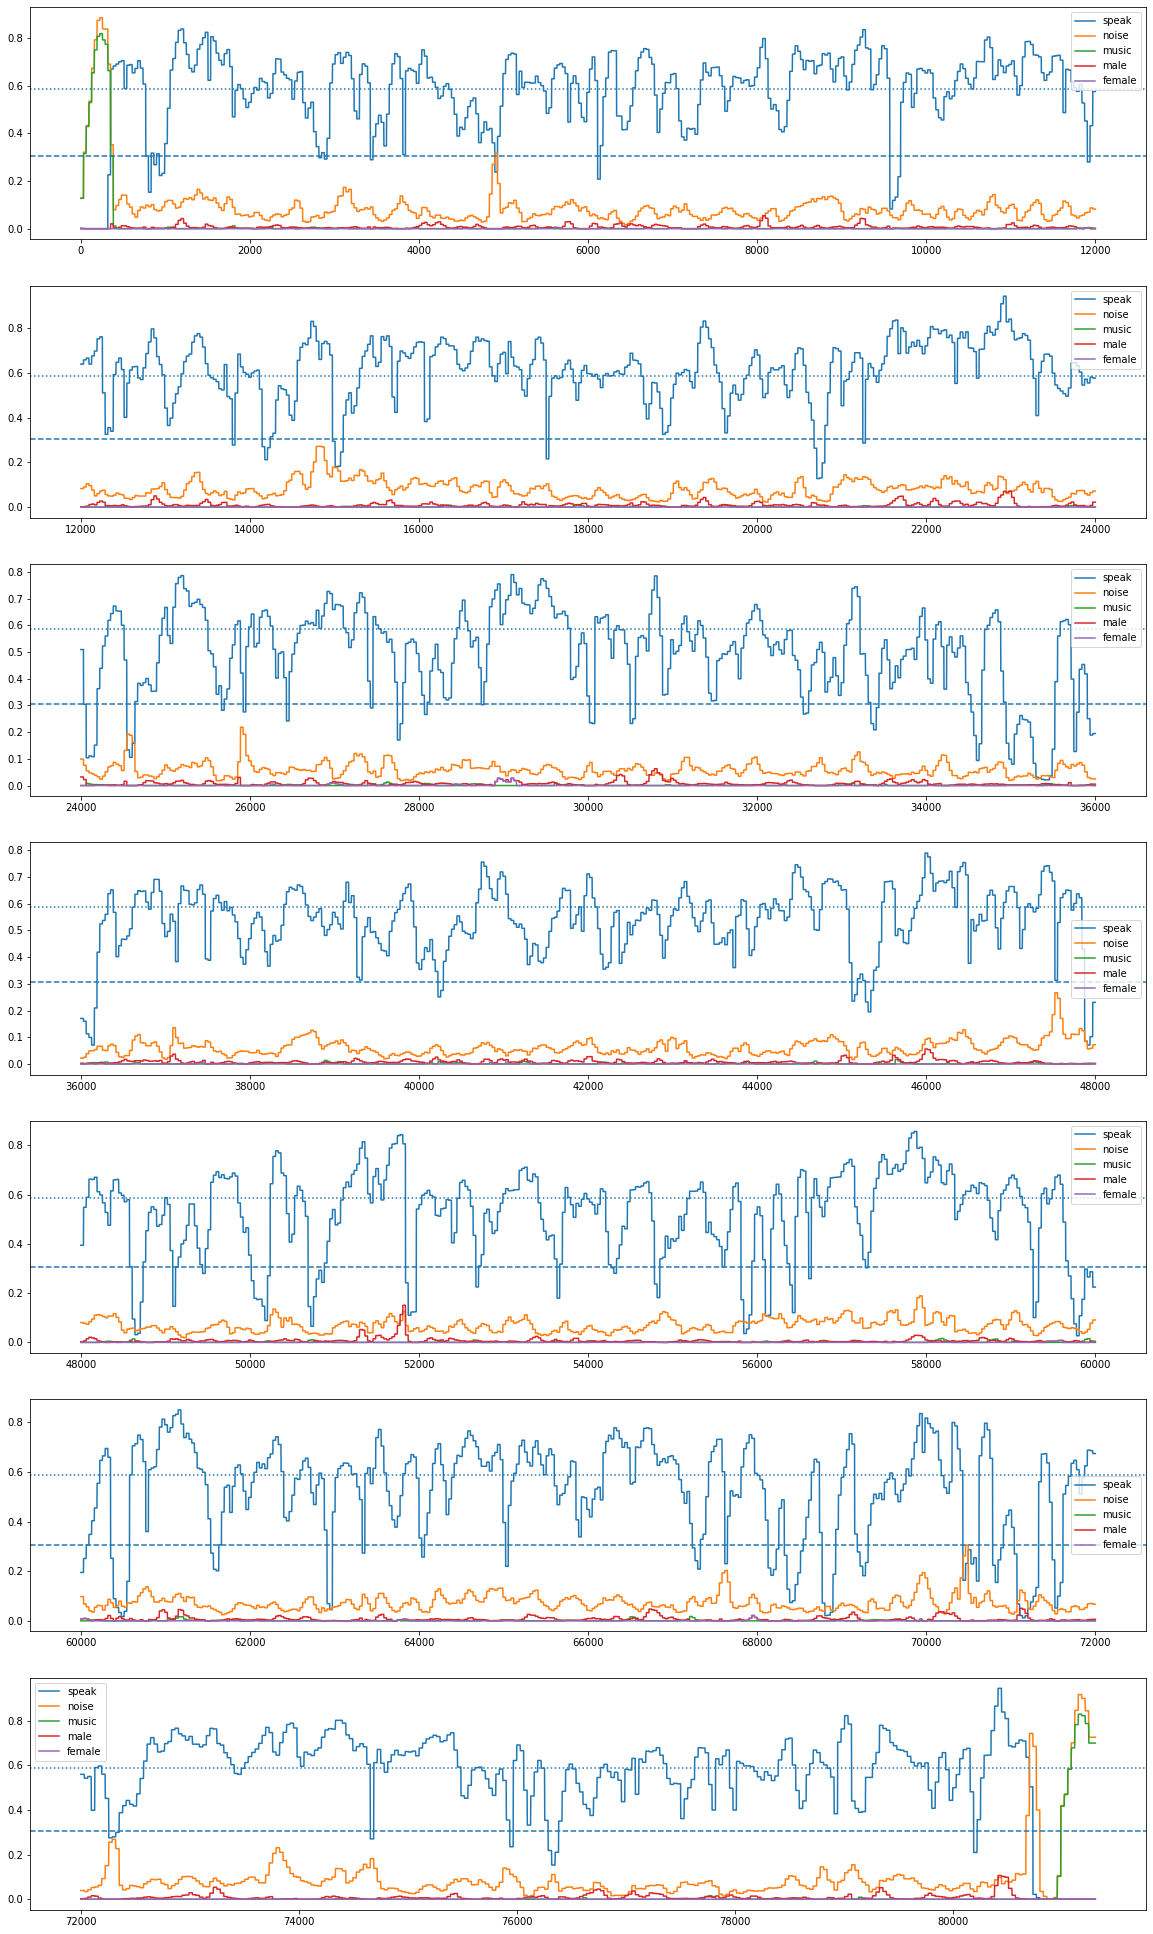

In [1]:

import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

labels = pickle.load(open('../labels', 'rb'))
framewise_output = pickle.load(open('../framewise_output', 'rb'))
kw = ['speech', 'speak', 'conversation']
nw = ['music']
def analyze_frame(probs, positibe_keys, negative_keys):
    top5 = np.argsort(-probs)[:5]
    events = {labels[i]: probs[i] for i in top5}
    speak = [p for e, p in events.items() for k in positibe_keys if k in e.lower()]
    noise = [p for e, p in events.items() if all([k not in e.lower() for k in positibe_keys])]
    music = [p for e, p in events.items() for k in negative_keys if k in e.lower()]
    male = [p for e, p in events.items() if 'male' in e.lower()]
    female = [p for e, p in events.items() if 'female' in e.lower()]
    stats = {
        'speak': sum(speak), 
        'noise': sum(noise), 
        'music': sum(music), 
        'male': sum(male), 
        'female': sum(female)
    }
    return stats


probs = framewise_output.mean(axis=0)
top10 = {labels[i]:probs[i] for i in np.argsort(-probs)[:10]}
print('Top 10 events:\n', top10)

selection = []
stats_all = pd.DataFrame([analyze_frame(f, kw, nw) for f in framewise_output])
size = 12000
n = int(stats_all.shape[0]/size)+1
fig = plt.figure()
speech_avg = stats_all['speak'].quantile(0.5)
speech_10 = stats_all['speak'].quantile(0.1)
for i in range(n):
    ax = fig.add_subplot(n,1,i+1)
    stats = stats_all[i*size:(i+1)*size]
    stats.plot(ax = ax, figsize = [20, 5*n])
    min_idx = stats.index[0]
    max_idx = stats.index[-1]
    ax.axline((min_idx, speech_10), (max_idx, speech_10), label='speak low', linestyle='--')
    ax.axline((min_idx, speech_avg), (max_idx, speech_avg), label='speak avg', linestyle=':')
ax
    


# Analysis

In [35]:
lists = glob('/mnt/nas/中科大44国语言/希伯来语/YouTube/*.csv')
path = choice(lists)
path

'/mnt/nas/中科大44国语言/希伯来语/YouTube/דיון בינלאומי בשידור חי- ההסכם עם האמירויות – מה צופן העתיד?(8).mp3.csv'

<AxesSubplot:>

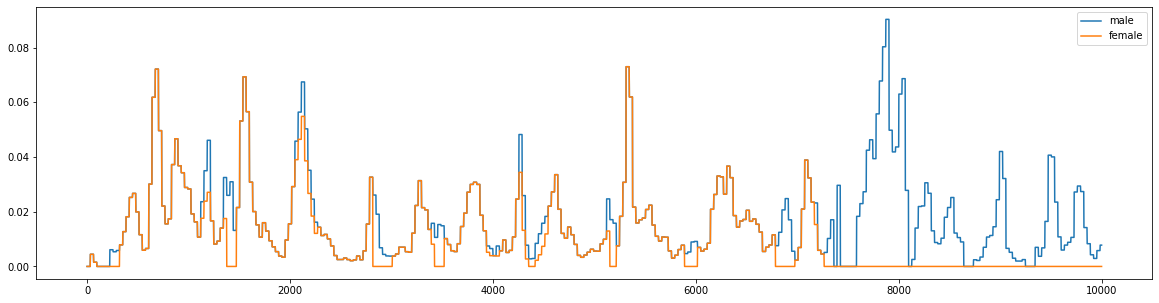

In [36]:
from glob import glob
from random import choice
import pandas as pd

stats = pd.read_csv(path)[:10000]
stats[['male', 'female']].plot(figsize=[20,5])

/home/stardust/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

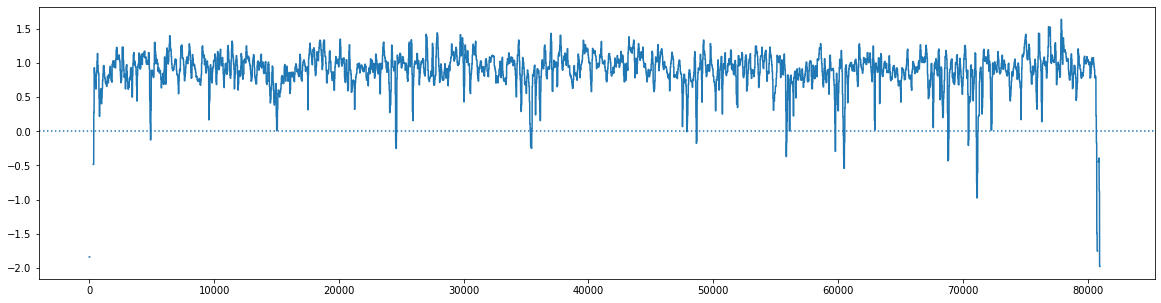

In [18]:
# noise analysis
ax = (stats_all.speak/stats_all.noise).apply('log10').plot(figsize=[20,5])
ax.axline((stats_all.index[0], 0), (stats_all.index[-1], 0), linestyle=':')
ax